In [76]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [77]:
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, delim_whitespace=True, names=names)

C:\Users\USER\AppData\Local\Temp\ipykernel_14684\36036531.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataset = read_csv(filename, delim_whitespace=True, names=names)


In [78]:
# shape
print(dataset.shape)
# types
print(dataset.dtypes)

(10001, 14)
CRIM       object
ZN         object
INDUS      object
CHAS       object
NOX        object
RM         object
AGE        object
DIS        object
RAD        object
TAX        object
PTRATIO    object
B          object
LSTAT      object
MEDV       object
dtype: object


In [79]:
# head
print(dataset.head(20))

                                                         CRIM           ZN  \
Avg.                                                     Area  Income,Avg.   
79545.45857,5.682861322,7.009188143,4.09,23086....    Michael        Ferry   
Laurabury,                                                 NE  37010-5101"   
79248.64245,6.002899808,6.730821019,3.09,40173....    Johnson        Views   
Lake                                                Kathleen,           CA   
61287.06718,5.86588984,8.51272743,5.13,36882.15...  Elizabeth    Stravenue   
Danieltown,                                                WI  06482-3489"   
63345.24005,7.188236095,5.586728665,3.26,34310....    Barnett          NaN   
FPO                                                        AP       44820"   
59982.19723,5.040554523,7.839387785,4.23,26354....    Raymond          NaN   
FPO                                                        AE       09386"   
80175.75416,4.988407758,6.104512439,4.04,26748....   Jennifer   

### Tóm tắt sự phân bố của từng thuộc tính

In [80]:
set_option('display.precision', 1)
print(dataset.describe())

         CRIM    ZN  INDUS  CHAS       NOX    RM     AGE DIS         RAD  \
count   10001  9816   4810  2254         1     1       1   1           1   
unique   2915  3016   2547   898         1     1       1   1           1   
top        AA   Box  Suite   386  Age,Avg.  Area  Number  of  Rooms,Avg.   
freq      177   329   1160     8         1     1       1   1           1   

         TAX PTRATIO   B          LSTAT                      MEDV  
count      1       1   1              1                         1  
unique     1       1   1              1                         1  
top     Area  Number  of  Bedrooms,Area  Population,Price,Address  
freq       1       1   1              1                         1  


### Biểu đồ mật độ để làm chúng mịn hơn một chút

CRIM     float64
INDUS    float64
CHAS     float64
dtype: object


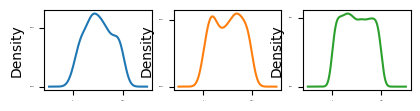

In [81]:
dataset_numeric = dataset.apply(pd.to_numeric, errors='coerce')

# Bỏ các cột mà toàn bộ giá trị bị NaN sau khi chuyển
dataset_numeric = dataset_numeric.dropna(axis=1, how='all')

# In lại kiểu dữ liệu để xác nhận
print(dataset_numeric.dtypes)

# Vẽ biểu đồ density nếu có cột số
if not dataset_numeric.empty:
    dataset_numeric.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1)
    pyplot.show()
else:
    print("Không có cột số hợp lệ để vẽ biểu đồ density.")

### Xem xét dữ liệu với các biểu đồ hộp và râu của từng thuộc tính
- Điều này giúp chỉ ra độ lệch trong nhiều bản phân phối đến mức dữ liệu trông giống như giá trị ngoại lệ

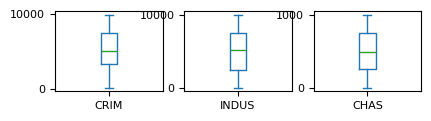

In [82]:
dataset_numeric.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=8)
pyplot.show()

### Đánh giá thuật toán: Đường cơ sở
- Chúng tôi không biết thuật toán nào sẽ hiệu quả với bài toán này.
- Chúng tôi sẽ đánh giá các thuật toán bằng cách sử dụng số liệu Lỗi bình phương trung bình (MSE). MSE sẽ đưa ra ý tưởng chung về mức độ sai lầm của tất cả các dự đoán (0 là hoàn hảo).